## Инициализация проекта

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

## Исследование данных

In [208]:
data = pd.read_csv('../data/smoke_detector_task.csv')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62484 non-null  float64
 3   Humidity[%]     62383 non-null  float64
 4   TVOC[ppb]       62009 non-null  float64
 5   eCO2[ppm]       62305 non-null  float64
 6   Raw H2          62519 non-null  float64
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62603 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62313 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62378 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(4), object(1)
memory usage: 7.6+ MB


In [210]:
data.head(20)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.0,0.000,0.000,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.0,0.000,0.000,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.0,0.000,0.000,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.0,0.000,0.000,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.0,0.000,0.000,4,No
5,5,1654733336,20.073,54.12,0.0,400.0,12419.0,18998,939.725,0.00,0.00,0.0,0.000,0.000,5,No
6,6,1654733337,20.088,53.61,0.0,400.0,12432.0,19058,939.738,0.00,0.00,0.0,0.000,0.000,6,No
7,7,1654733338,20.103,53.20,0.0,400.0,12439.0,19114,939.758,0.00,0.00,0.0,0.000,0.000,7,No
8,8,1654733339,20.117,52.81,0.0,400.0,12448.0,19155,939.758,0.00,0.00,0.0,0.000,0.000,8,No
9,9,1654733340,20.132,52.46,0.0,400.0,12453.0,19195,939.756,0.90,3.78,0.0,4.369,2.780,9,No


## Удаление неинформативных столбцов

Удаление столбцов 'Unnamed: 0', содержащего id записей, а также 'UTC', содержащего информацию о времени опроса датчиков:

In [211]:
data = data.drop(['Unnamed: 0', 'UTC'], axis=1)
data.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,62484.000000,62383.000000,62009.000000,62305.000000,62519.000000,62630.000000,62603.000000,62630.000000,62313.000000,62630.000000,62378.000000,62630.000000,62630.000000
mean,15.972252,48.536969,1944.124030,670.574994,12942.383835,19754.257912,938.627644,100.594309,184.443467,491.463608,203.382660,80.049042,10511.386157
std,14.361206,8.868993,7819.668069,1909.675941,272.531480,609.513156,1.331169,922.524245,1976.590473,4265.661251,2214.719662,1083.383189,7597.870997
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000500,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000
50%,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.942000,0.044000,9336.000000
75%,25.410000,53.240000,1189.000000,438.000000,13108.000000,20078.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


## Обработка пропущенных значений

In [212]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False) #

TVOC[ppb]         0.991538
eCO2[ppm]         0.518921
PM2.5             0.506147
NC1.0             0.402363
Humidity[%]       0.394380
Temperature[C]    0.233115
Raw H2            0.177231
Pressure[hPa]     0.043110
Raw Ethanol       0.000000
PM1.0             0.000000
NC0.5             0.000000
NC2.5             0.000000
CNT               0.000000
Fire Alarm        0.000000
dtype: float64

Кол-во пропущенных значений маленькое (<1%), поэтому удалим строки,в которых встрчаются пропуски 

In [213]:
data.dropna(inplace=True)
data.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

## Коррекция типов
Преобразуем значения Yes/No в столбце 'Fire Alarm' в 1/0

In [214]:
data['Fire Alarm'] = data['Fire Alarm'].replace({'No' : 0, 'Yes': 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60603 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  60603 non-null  float64
 1   Humidity[%]     60603 non-null  float64
 2   TVOC[ppb]       60603 non-null  float64
 3   eCO2[ppm]       60603 non-null  float64
 4   Raw H2          60603 non-null  float64
 5   Raw Ethanol     60603 non-null  int64  
 6   Pressure[hPa]   60603 non-null  float64
 7   PM1.0           60603 non-null  float64
 8   PM2.5           60603 non-null  float64
 9   NC0.5           60603 non-null  float64
 10  NC1.0           60603 non-null  float64
 11  NC2.5           60603 non-null  float64
 12  CNT             60603 non-null  int64  
 13  Fire Alarm      60603 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 6.9 MB


/var/folders/s6/j_4p__nd5kg5dvjxbj6y3ywh0000gn/T/ipykernel_3167/2117017021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Fire Alarm'] = data['Fire Alarm'].replace({'No' : 0, 'Yes': 1})


## Проверка данных

In [215]:
data.drop_duplicates(inplace=True)
int(data.duplicated().sum())

0

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60601 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  60601 non-null  float64
 1   Humidity[%]     60601 non-null  float64
 2   TVOC[ppb]       60601 non-null  float64
 3   eCO2[ppm]       60601 non-null  float64
 4   Raw H2          60601 non-null  float64
 5   Raw Ethanol     60601 non-null  int64  
 6   Pressure[hPa]   60601 non-null  float64
 7   PM1.0           60601 non-null  float64
 8   PM2.5           60601 non-null  float64
 9   NC0.5           60601 non-null  float64
 10  NC1.0           60601 non-null  float64
 11  NC2.5           60601 non-null  float64
 12  CNT             60601 non-null  int64  
 13  Fire Alarm      60601 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 6.9 MB


In [217]:
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## Обработка выбросов

Данные выглядят чистыми и готовыми к проведению EDA

/Users/nikolajsemikin/Documents/Programming/ML-studying/.venv/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: >

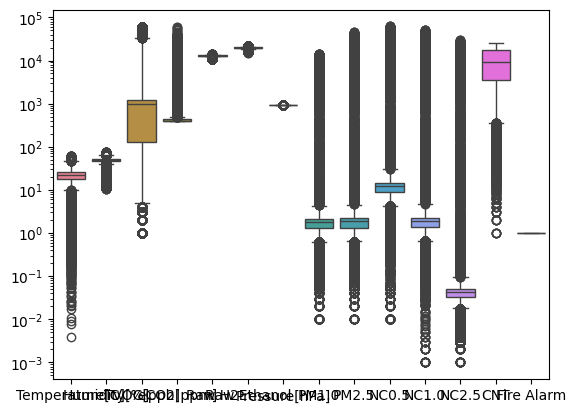

In [218]:
sns.boxplot(data, log_scale=True)

В данных наблюдается много выбросов

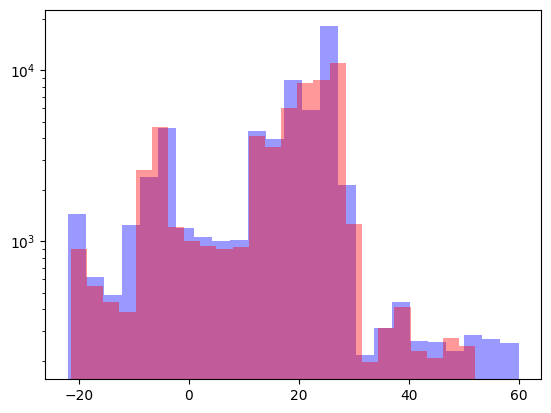

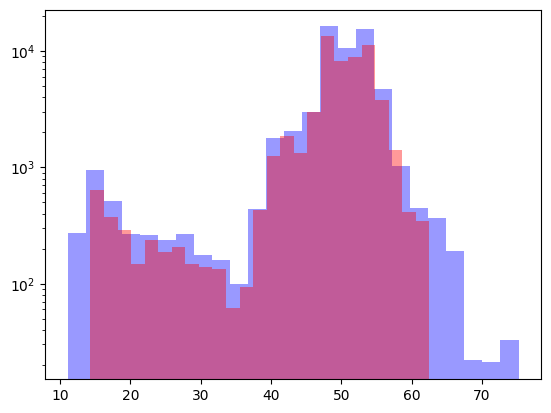

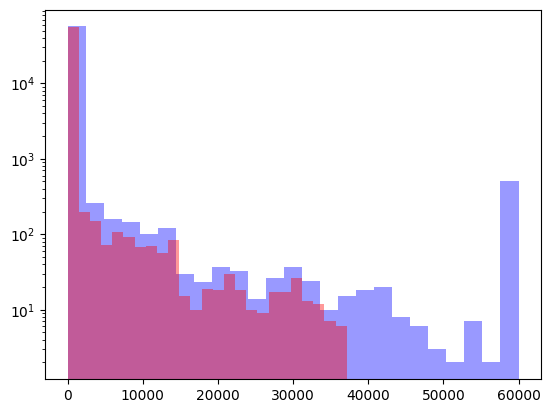

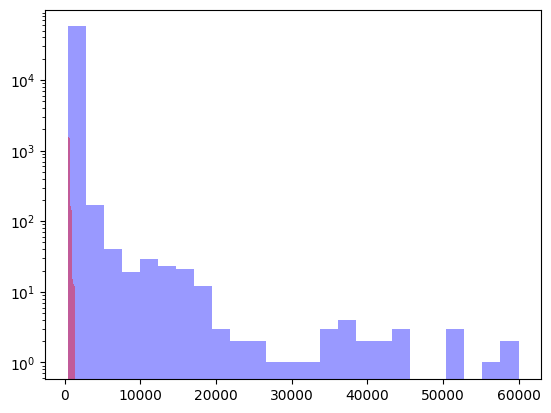

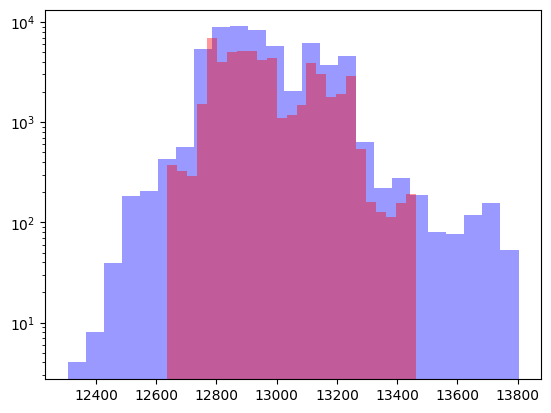

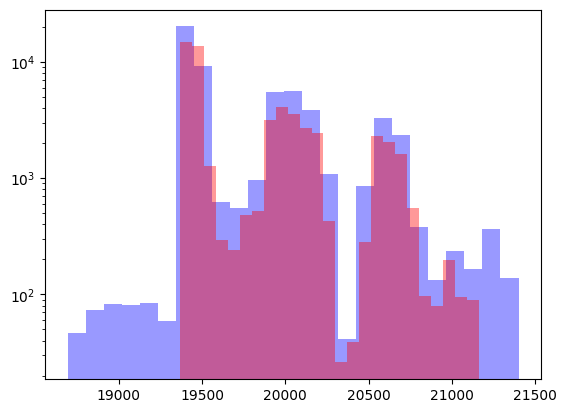

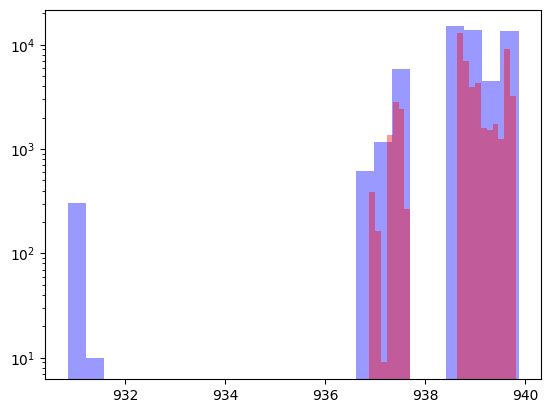

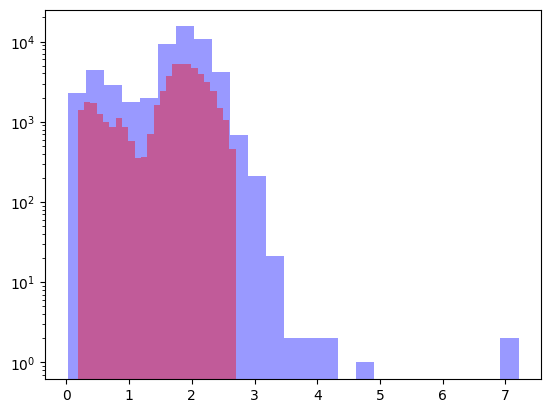

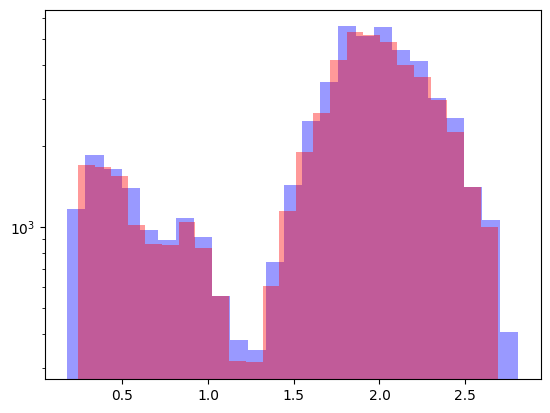

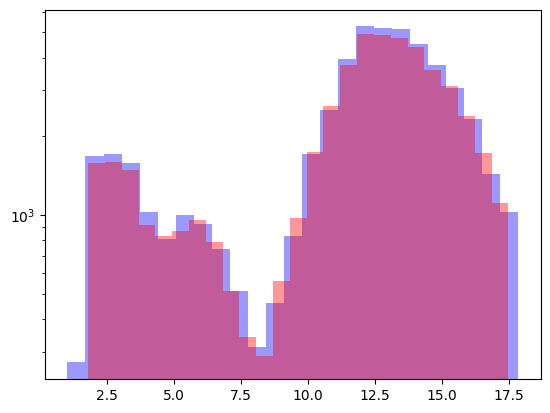

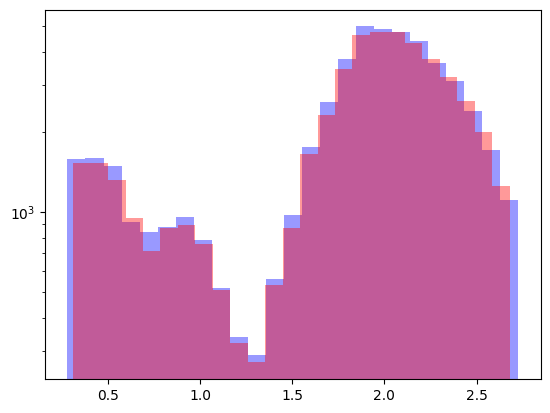

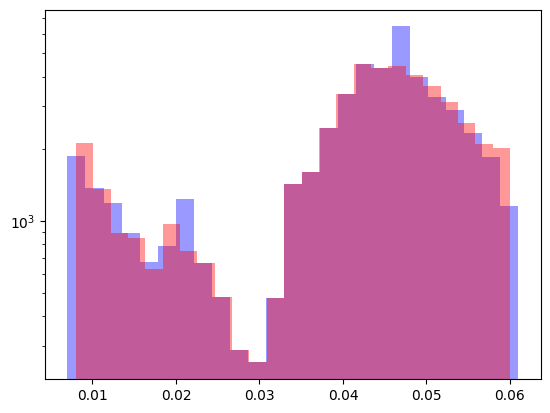

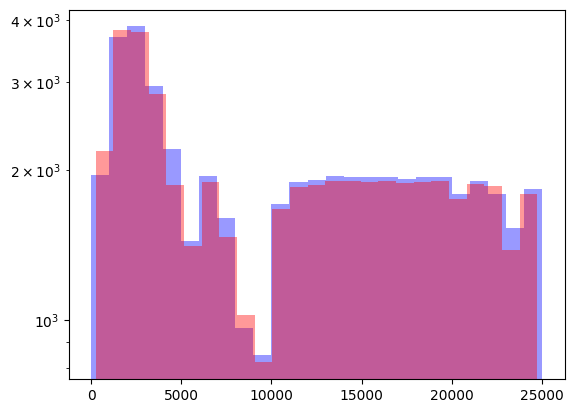

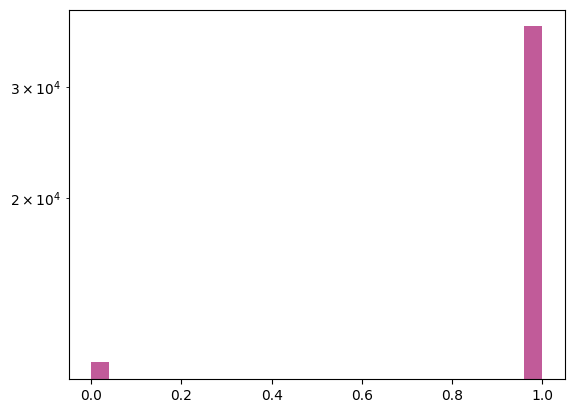

In [219]:
for column in data.columns:
    plt.hist(data[column], bins=25, log=True,color='blue', alpha=0.4)
    lower_bound = data[column].quantile(0.01)
    upper_bound = data[column].quantile(0.99)

    data = data[data[column] >= lower_bound]
    data = data[data[column] <= upper_bound]
    plt.hist(data[column], bins=25, log=True,color='red', alpha=0.4)

    plt.show()

In [220]:
# for column in data.columns:
#     data.hist(column, bins=1000, log=True)


<Axes: >

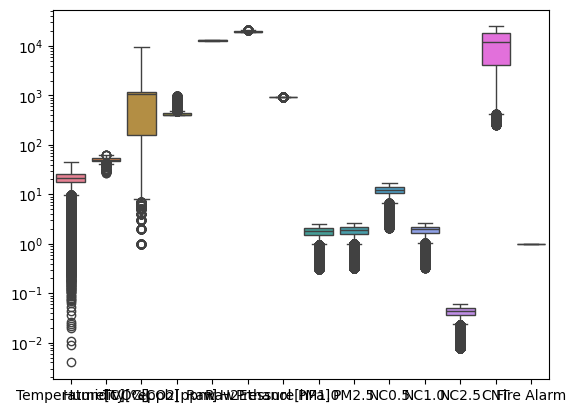

In [221]:
sns.boxplot(data, log_scale=True)

label binarizer for days of week // scikitlearn
разбить на 3 столбца 
0|0|0| - пн
0|0|1| - вт